In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire as a
import prepare as p

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



In [2]:
store_df = a.acquire_store()

In [3]:
store_df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
store_df = p.prep_store(store_df)

In [5]:
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


In [6]:
train_len = int(0.6 * len(store_df))
val_test_split = int(0.8 * len(store_df))
train_len, val_test_split

(547800, 730400)

In [7]:
train = store_df.iloc[:train_len]
val = store_df.iloc[train_len:val_test_split]
test = store_df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((547800, 9), (182600, 9), (182600, 9))

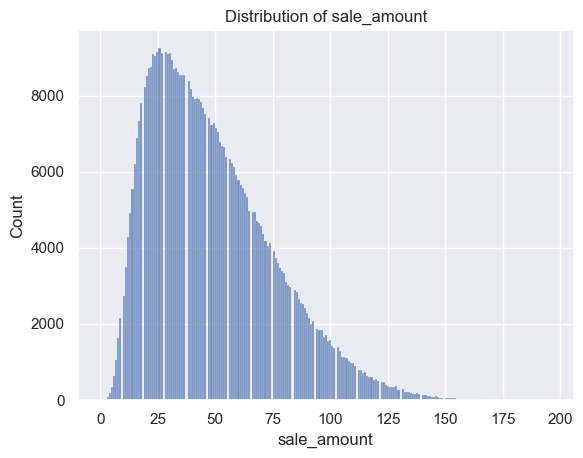

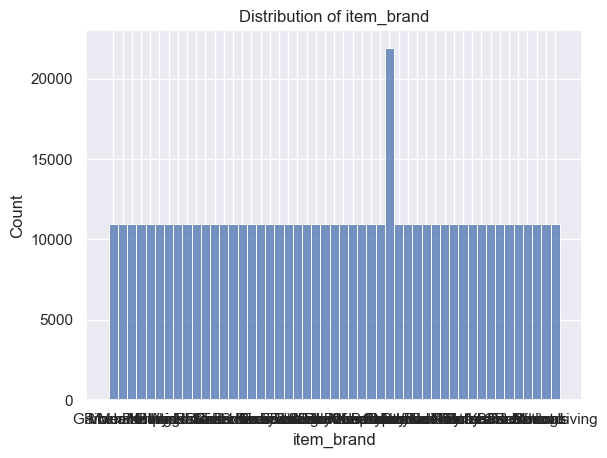

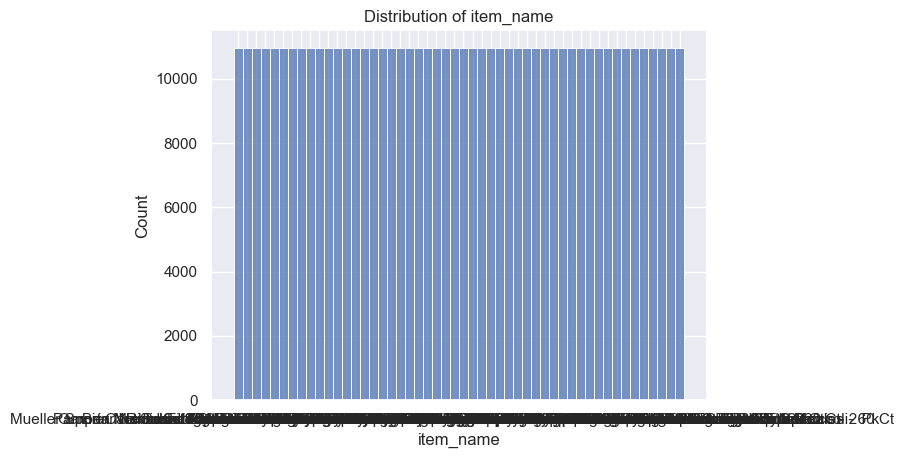

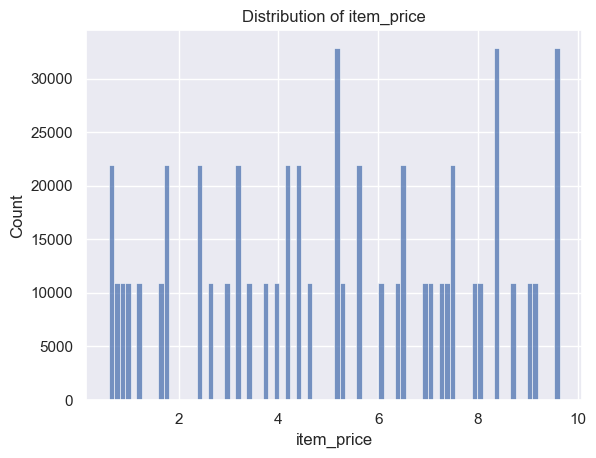

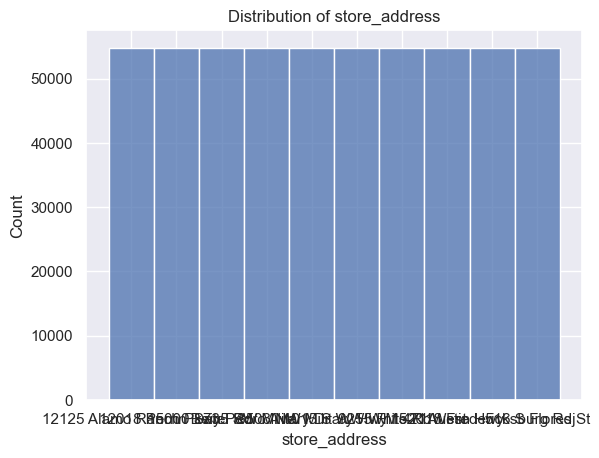

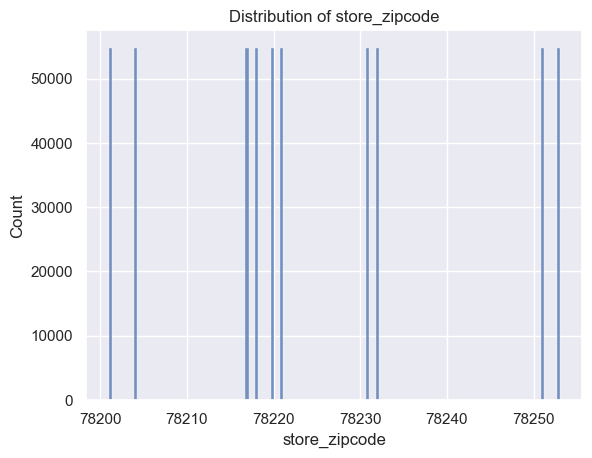

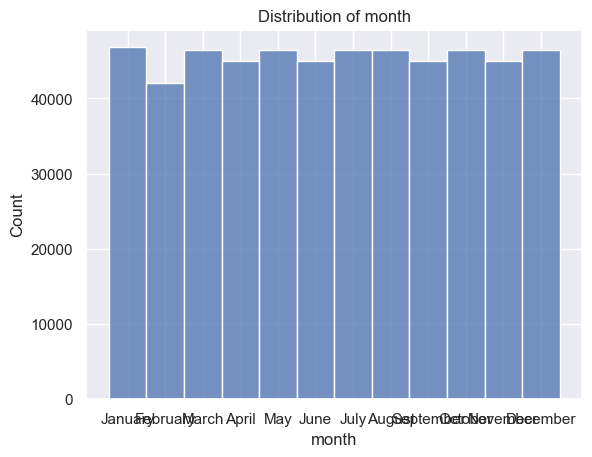

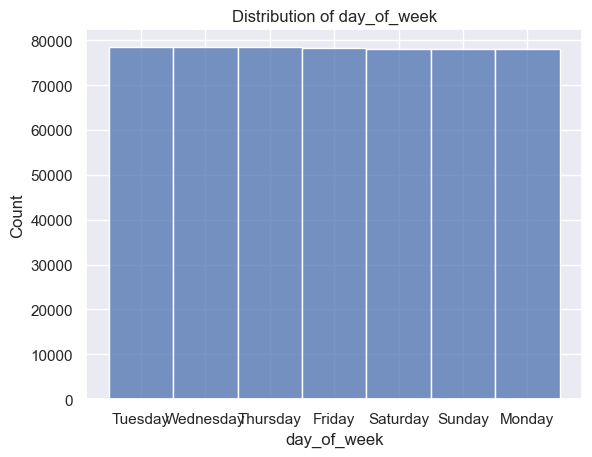

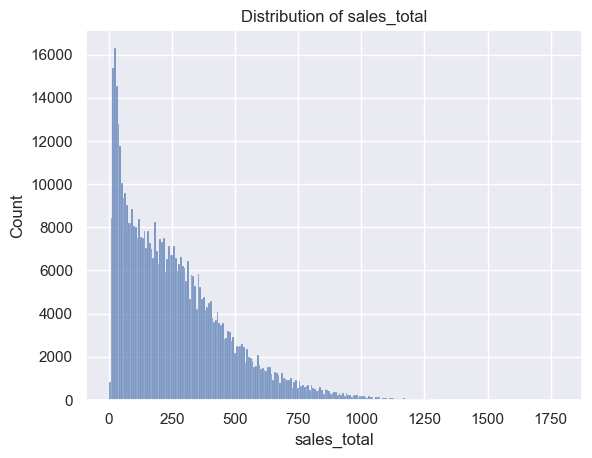

In [8]:
p.plot_distributions(train)

<AxesSubplot:xlabel='sale_date'>

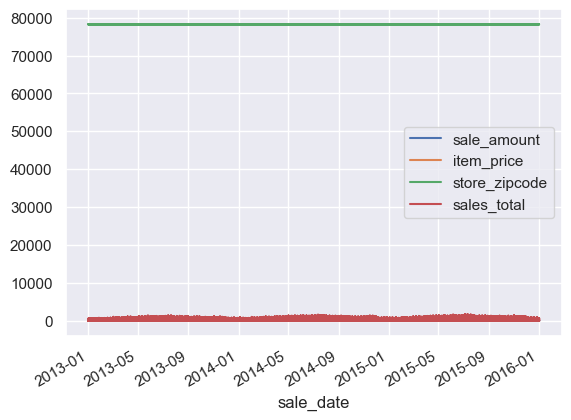

In [9]:
train.plot()

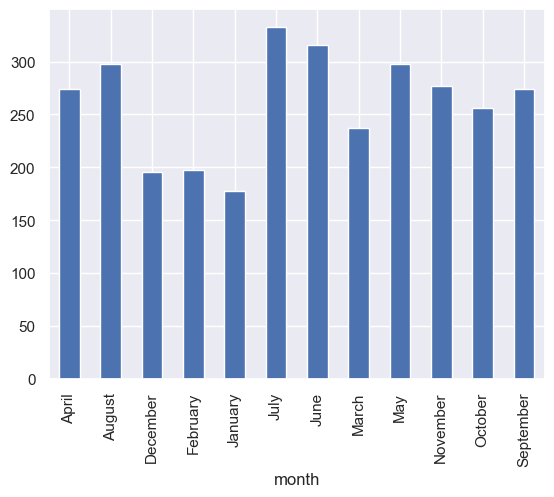

In [10]:
train.groupby('month')['sales_total'].mean().plot.bar()
plt.show()

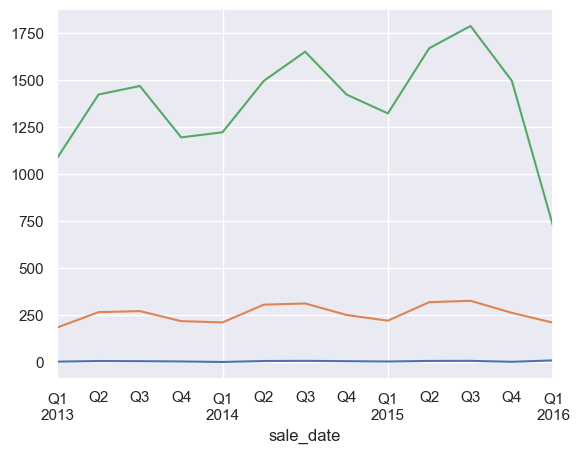

In [11]:
train.resample('Q').min()['sales_total'].plot()
train.resample('Q').mean()['sales_total'].plot()
train.resample('Q').max()['sales_total'].plot()
plt.show()

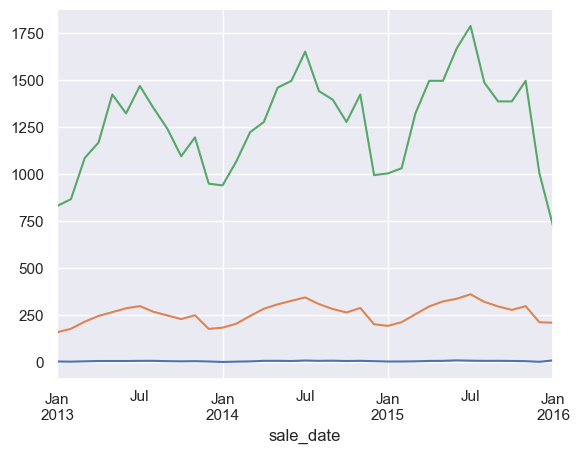

In [12]:
train.resample('M').min()['sales_total'].plot()
train.resample('M').mean()['sales_total'].plot()
train.resample('M').max()['sales_total'].plot()
plt.show()

In [13]:
week_mean = train.resample('W').mean()
week_mean

,sale_amount,item_price,store_zipcode,sales_total
sale_date,,,,
2013-01-06,30.355667,5.160400,78224.800000,163.589167
2013-01-13,29.686286,5.160400,78224.800000,159.981203
2013-01-20,29.414286,5.160400,78224.800000,157.946720
2013-01-27,29.513714,5.160400,78224.800000,158.545383
2013-02-03,31.150571,5.160400,78224.800000,167.585014
...,...,...,...,...
2015-12-06,41.171143,5.160400,78224.800000,221.695289
2015-12-13,39.317143,5.160400,78224.800000,211.503734
2015-12-20,39.510286,5.160400,78224.800000,212.435217


In [14]:
week_mean['shifted'] = week_mean['sales_total'].shift(-1)

week_mean

,sale_amount,item_price,store_zipcode,sales_total,shifted
sale_date,,,,,
2013-01-06,30.355667,5.160400,78224.800000,163.589167,159.981203
2013-01-13,29.686286,5.160400,78224.800000,159.981203,157.946720
2013-01-20,29.414286,5.160400,78224.800000,157.946720,158.545383
2013-01-27,29.513714,5.160400,78224.800000,158.545383,167.585014
2013-02-03,31.150571,5.160400,78224.800000,167.585014,176.455603
...,...,...,...,...,...
2015-12-06,41.171143,5.160400,78224.800000,221.695289,211.503734
2015-12-13,39.317143,5.160400,78224.800000,211.503734,212.435217
2015-12-20,39.510286,5.160400,78224.800000,212.435217,211.800551


Text(0, 0.5, 'Sales Tomorrow')

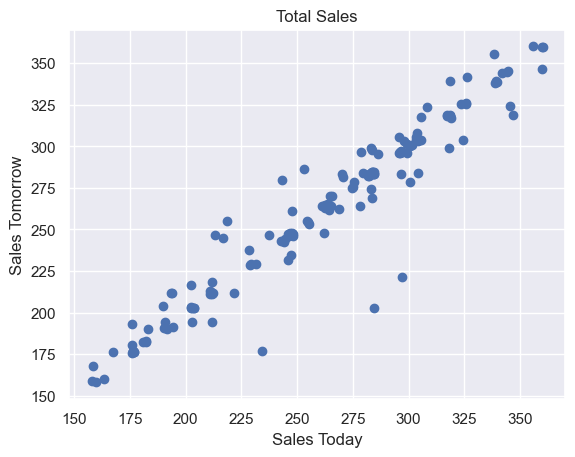

In [15]:
plt.scatter(week_mean['sales_total'], week_mean['shifted'])
plt.title('Total Sales')
plt.xlabel('Sales Today')
plt.ylabel('Sales Tomorrow')

In [16]:
week_mean['half_year'] = week_mean['sales_total'].shift(-26)
week_mean.head()

,sale_amount,item_price,store_zipcode,sales_total,shifted,half_year
sale_date,,,,,,
2013-01-06,30.355667,5.1604,78224.8,163.589167,159.981203,299.209394
2013-01-13,29.686286,5.1604,78224.8,159.981203,157.946720,301.578849
2013-01-20,29.414286,5.1604,78224.8,157.946720,158.545383,300.565134
2013-01-27,29.513714,5.1604,78224.8,158.545383,167.585014,300.484531
2013-02-03,31.150571,5.1604,78224.8,167.585014,176.455603,278.376257


Text(0, 0.5, 'Sales In Half Year')

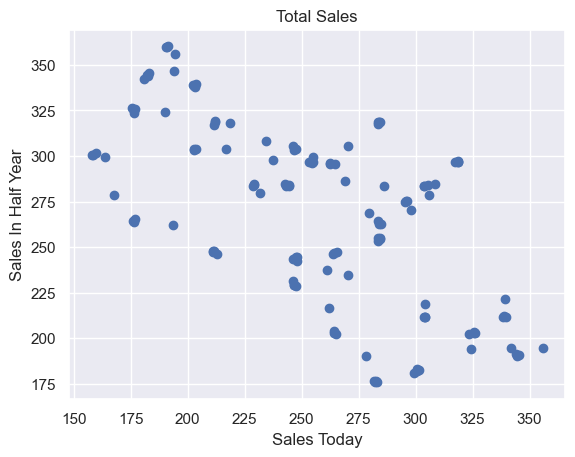

In [17]:
plt.scatter(week_mean['sales_total'], week_mean['half_year'])
plt.title('Total Sales')
plt.xlabel('Sales Today')
plt.ylabel('Sales In Half Year')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

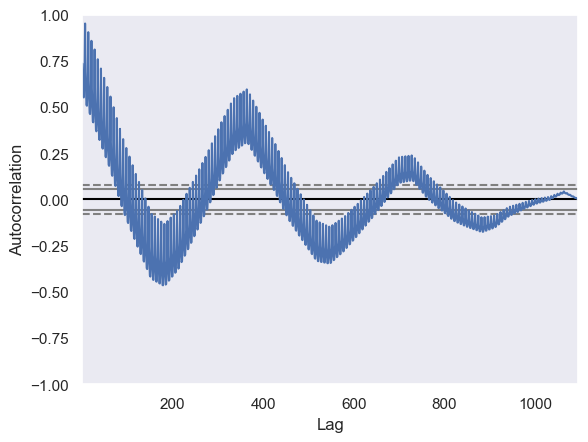

In [18]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('D').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

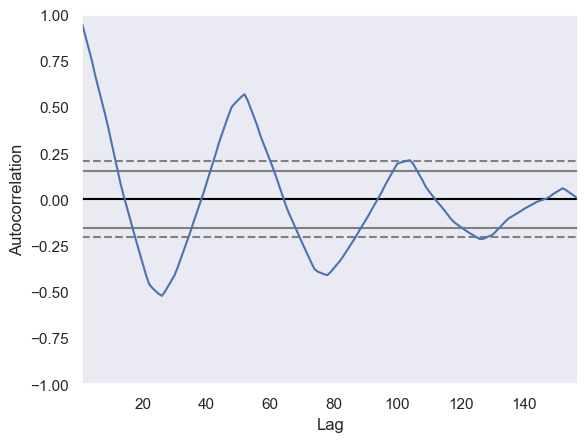

In [19]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

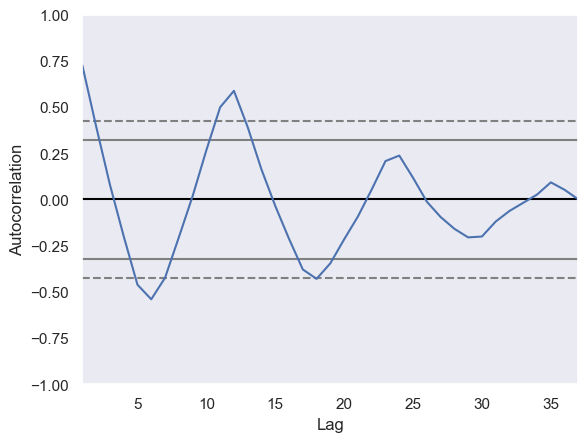

In [20]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

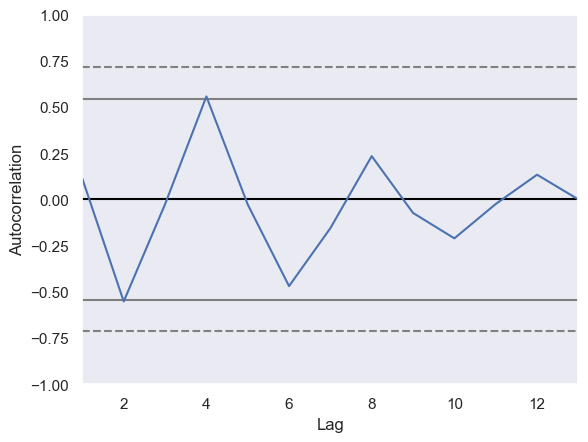

In [21]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('Q').mean())

In [22]:
germany = a.get_germany_data()

In [25]:
germany = p.prep_germany_data(germany)
germany.head()

,consumption,wind,solar,wind_solar,month,day_of_week,year
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,Sunday,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,Monday,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,Tuesday,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,Wednesday,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,Thursday,2006


In [26]:
train_len = int(0.6 * len(germany))
val_test_split = int(0.8 * len(germany))
train_len, val_test_split

(2629, 3506)

In [27]:
train = germany.iloc[:train_len]
val = germany.iloc[train_len:val_test_split]
test = germany.iloc[val_test_split:]
train.shape, val.shape, test.shape

((2629, 7), (877, 7), (877, 7))

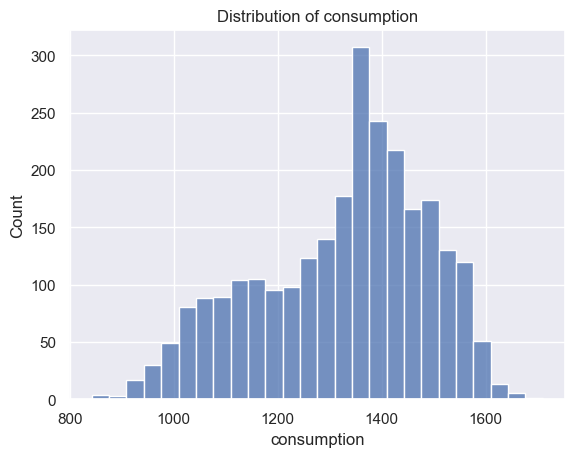

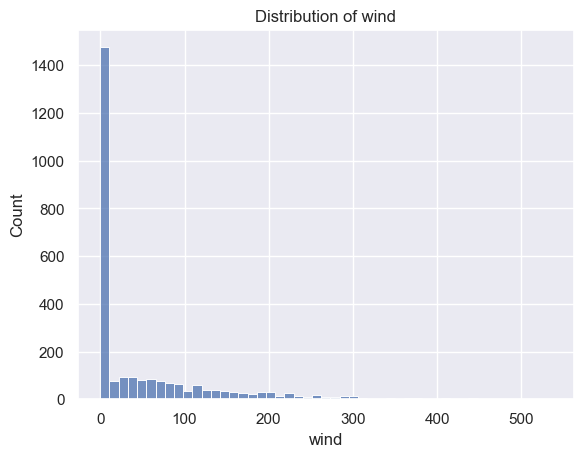

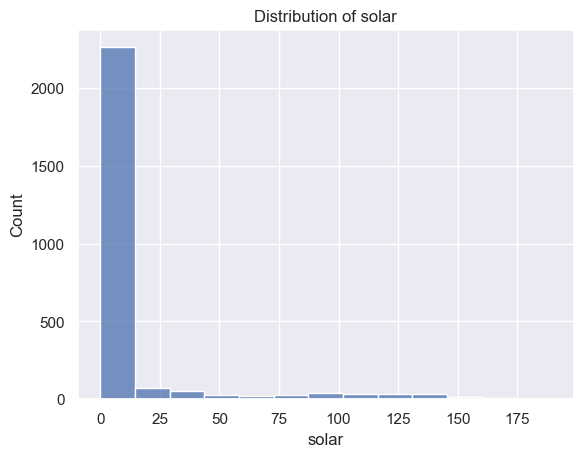

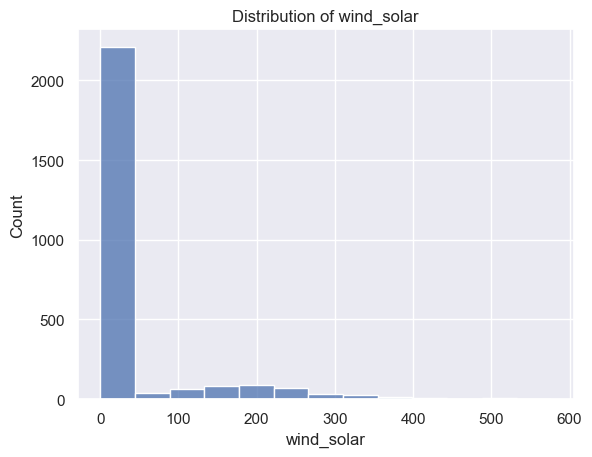

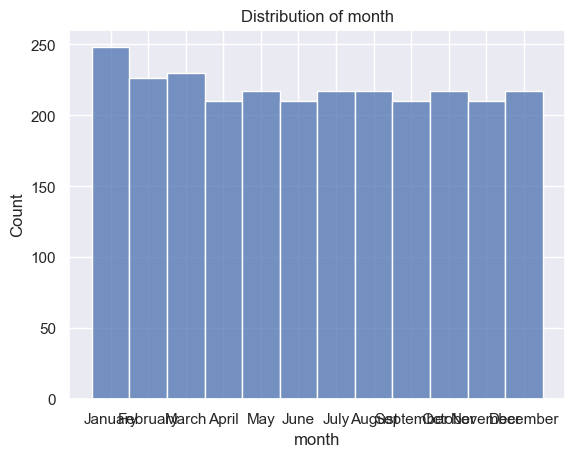

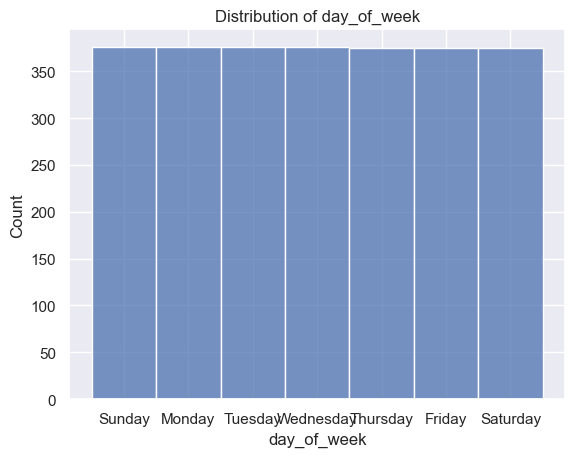

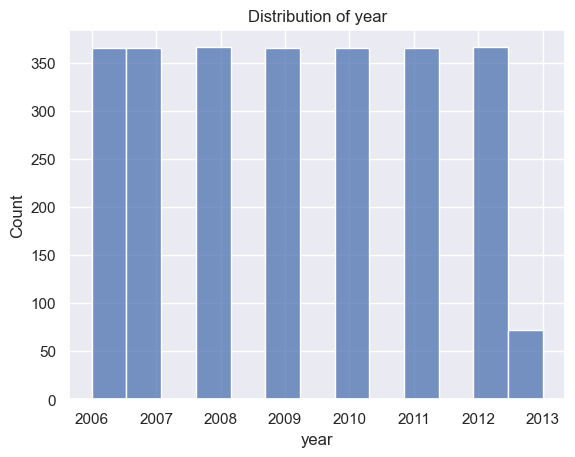

In [28]:
p.plot_distributions(train)

<AxesSubplot:xlabel='Date'>

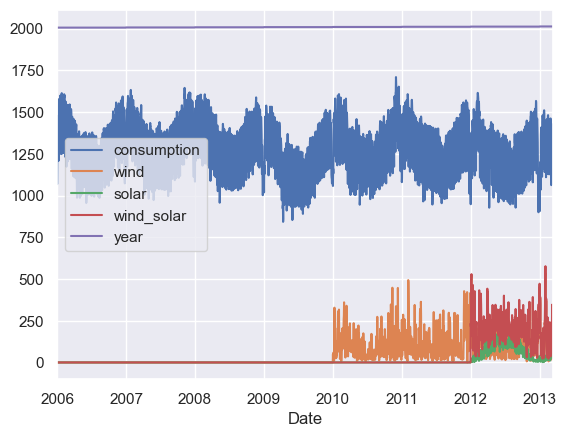

In [29]:
train.plot()

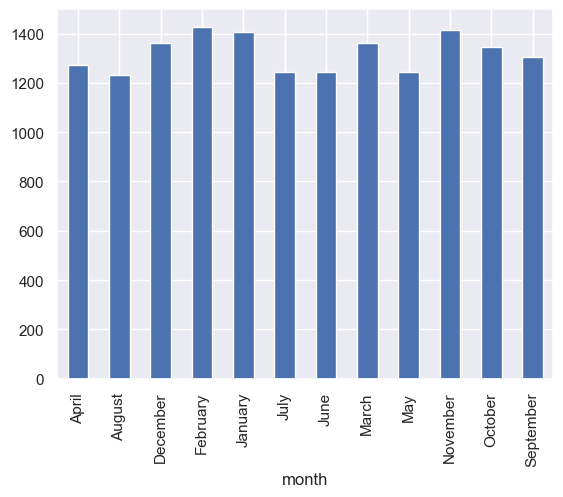

In [30]:
train.groupby('month')['consumption'].mean().plot.bar()
plt.show()

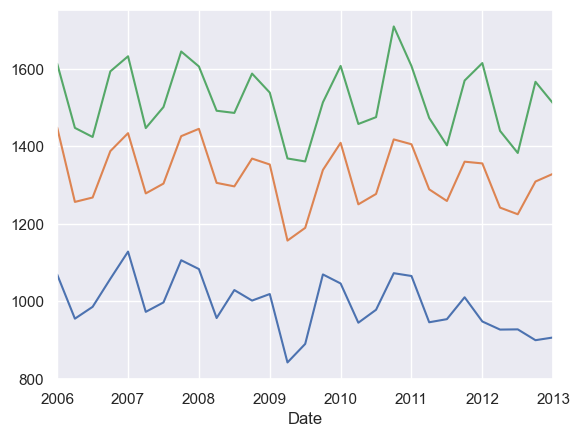

In [31]:
train.resample('Q').min()['consumption'].plot()
train.resample('Q').mean()['consumption'].plot()
train.resample('Q').max()['consumption'].plot()
plt.show()

In [32]:
week_mean = train.resample('W').mean()
week_mean

,consumption,wind,solar,wind_solar,year
Date,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0
...,...,...,...,...,...
2013-02-17,1367.142143,68.448714,25.797571,94.246286,2013.0
2013-02-24,1348.114857,126.143571,24.747857,150.891429,2013.0
2013-03-03,1333.157143,79.604143,39.010571,118.614714,2013.0


In [33]:
week_mean['shifted'] = week_mean['consumption'].shift(-1)

week_mean

,consumption,wind,solar,wind_solar,year,shifted
Date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2013-02-17,1367.142143,68.448714,25.797571,94.246286,2013.0,1348.114857
2013-02-24,1348.114857,126.143571,24.747857,150.891429,2013.0,1333.157143
2013-03-03,1333.157143,79.604143,39.010571,118.614714,2013.0,1288.966000


Text(0, 0.5, 'Consumption Tomorrow')

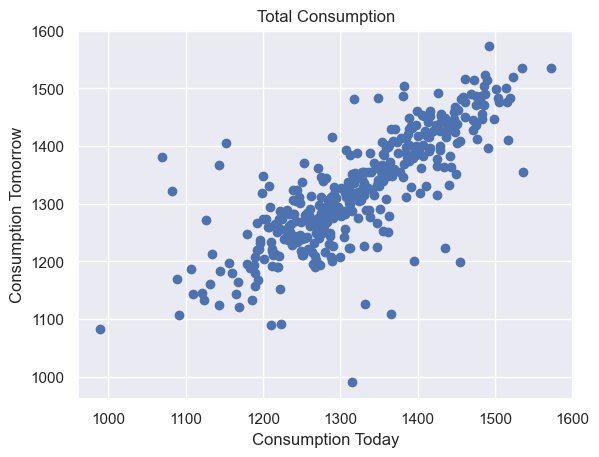

In [34]:
plt.scatter(week_mean['consumption'], week_mean['shifted'])
plt.title('Total Consumption')
plt.xlabel('Consumption Today')
plt.ylabel('Consumption Tomorrow')

In [35]:
week_mean['half_year'] = week_mean['consumption'].shift(-26)
week_mean.head()

,consumption,wind,solar,wind_solar,year,shifted,half_year
Date,,,,,,,
2006-01-01,1069.184000,0.0,0.0,0.0,2006.0,1381.300143,1254.896857
2006-01-08,1381.300143,0.0,0.0,0.0,2006.0,1486.730286,1279.510571
2006-01-15,1486.730286,0.0,0.0,0.0,2006.0,1490.031143,1260.945286
2006-01-22,1490.031143,0.0,0.0,0.0,2006.0,1514.176857,1261.179714
2006-01-29,1514.176857,0.0,0.0,0.0,2006.0,1501.403286,1263.756571


Text(0, 0.5, 'Consumption In Half Year')

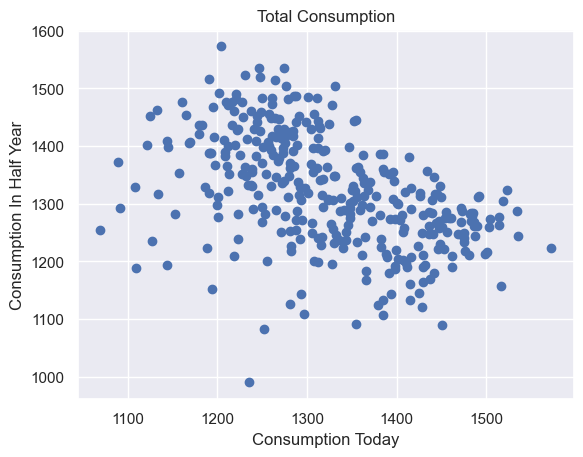

In [36]:
plt.scatter(week_mean['consumption'], week_mean['half_year'])
plt.title('Total Consumption')
plt.xlabel('Consumption Today')
plt.ylabel('Consumption In Half Year')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

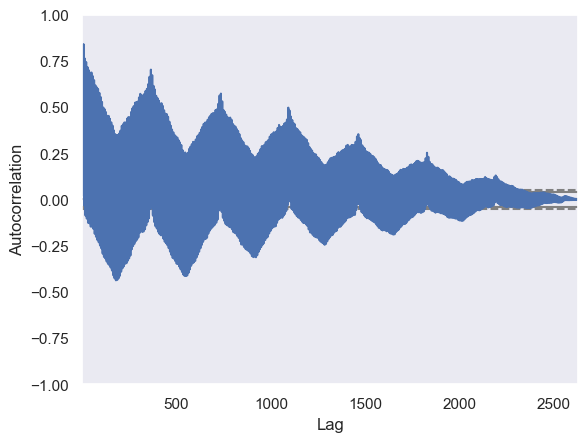

In [37]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('D').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

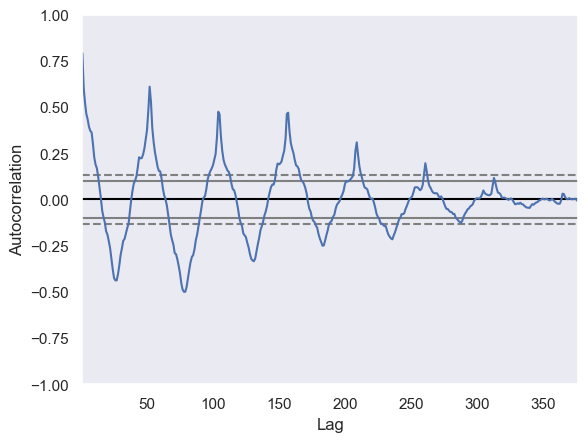

In [38]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

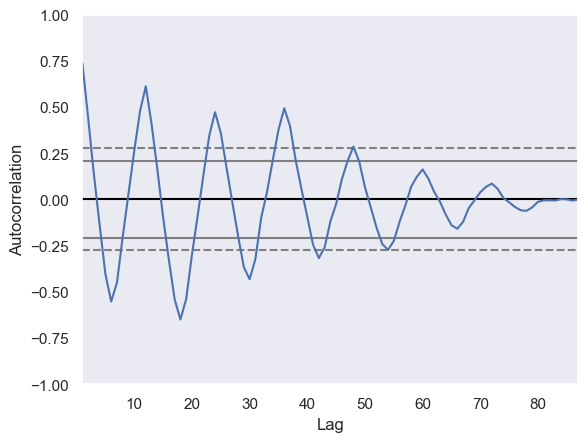

In [39]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

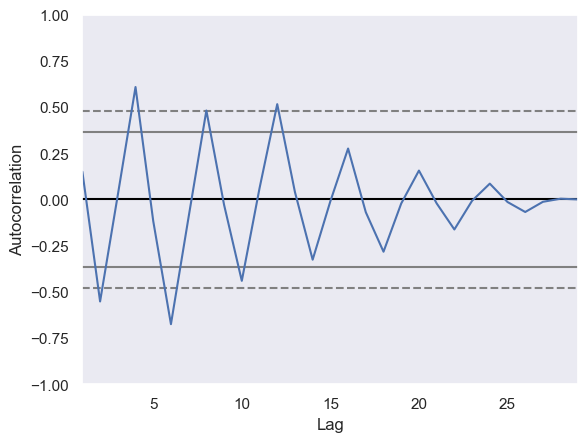

In [40]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('Q').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

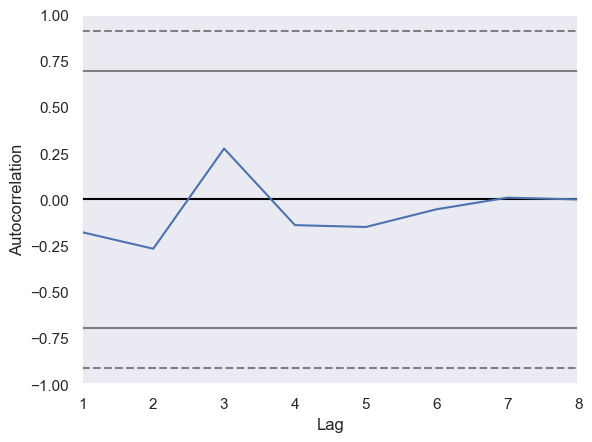

In [41]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('Y').mean())